In [51]:
#importing libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [52]:
#importing dataset
training_df = pd.read_csv('training.csv')

In [53]:
training_df.head(5)

,Unnamed: 0,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,82590,82591,SGP,47.0,11,0,0.00,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,82591,82592,SGP,16.0,11,130,483.48,155.1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,82592,82593,SGP,15.0,11,0,0.00,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,82593,82594,SGP,12.0,11,0,0.00,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,82594,82595,PRT,NaN,11,0,0.00,0.0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [54]:
training_df.shape

(1000, 30)

In [55]:
training_df.describe()

,Unnamed: 0,ID,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
count,1000.000000,1000.000000,967.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.0,1000.000000,...,1000.0,1000.000000,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.0,1000.000000
mean,83089.500000,83090.500000,39.720786,4.100000,36.840000,163.522530,42.612590,0.0,0.0,0.485000,...,0.0,0.006000,0.0,0.047000,0.440000,0.125000,0.003000,0.0,0.0,0.115000
std,288.819436,288.819436,19.161205,3.124702,66.375508,302.384328,96.491848,0.0,0.0,0.511896,...,0.0,0.077266,0.0,0.211745,0.496635,0.330884,0.054717,0.0,0.0,0.319182
min,82590.000000,82591.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
25%,82839.750000,82840.750000,25.000000,2.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
50%,83089.500000,83090.500000,42.000000,3.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
75%,83339.250000,83340.250000,53.000000,6.000000,41.250000,252.000000,42.000000,0.0,0.0,1.000000,...,0.0,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.000000
max,83589.000000,83590.000000,90.000000,11.000000,340.000000,3104.000000,1139.500000,0.0,0.0,2.000000,...,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000


In [56]:
#creating labels and features
labels = training_df['BookingsCheckedIn']
features = training_df.drop(columns=['BookingsCheckedIn'])

In [57]:
print(labels[0:5:1])

0    0
1    1
2    0
3    0
4    0
Name: BookingsCheckedIn, dtype: int64


In [58]:
#data preprocessing
labels.replace(0,0,inplace=True)
labels.replace(not 0,1,inplace=True)

In [59]:
labels[0:5:1]

0    0
1    1
2    0
3    0
4    0
Name: BookingsCheckedIn, dtype: int64

In [60]:
features[0:5:1]

,Unnamed: 0,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,82590,82591,SGP,47.0,11,0,0.00,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,82591,82592,SGP,16.0,11,130,483.48,155.1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,82592,82593,SGP,15.0,11,0,0.00,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,82593,82594,SGP,12.0,11,0,0.00,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,82594,82595,PRT,NaN,11,0,0.00,0.0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [61]:
#data preprocessing, here we replace textual data with random numeric data
features = pd.get_dummies(features)
features[0:5]

,Unnamed: 0,ID,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,PersonsNights,...,DistributionChannel_Corporate,DistributionChannel_Direct,DistributionChannel_Electronic Distribution,DistributionChannel_Travel Agent/Operator,MarketSegment_Aviation,MarketSegment_Complementary,MarketSegment_Corporate,MarketSegment_Direct,MarketSegment_Other,MarketSegment_Travel Agent/Operator
0,82590,82591,47.0,11,0,0.00,0.0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,82591,82592,16.0,11,130,483.48,155.1,0,0,15,...,0,0,0,1,0,0,0,0,1,0
2,82592,82593,15.0,11,0,0.00,0.0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,82593,82594,12.0,11,0,0.00,0.0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,82594,82595,NaN,11,0,0.00,0.0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [62]:
features = features.values.astype('float32')
labels = labels.values.astype('float32')
print(features[0:2])
print(labels[0:2])
print(len(features[0]))

[[ 8.2590e+04  8.2591e+04  4.7000e+01  1.1000e+01  0.0000e+00  0.0000e+00
   0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00 -1.0000e+00
  -1.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
   0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
   0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
   0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
   0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
   0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
   0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
   0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
   0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
   0.0000e+00  1.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
   0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
   1.0000e+00  0.0000e+00  0.0000e+00 

In [83]:
#splitting training and testing and validation data
features_train, features_test, labels_train, labels_test=train_test_split(features,labels,test_size=0.2)
features_train, features_validation, labels_train, labels_validation = train_test_split(features,labels,test_size=0.2)

In [142]:
#creating a sequential model
import tensorflow as tf
from tensorflow import keras
classifier = keras.Sequential([keras.layers.Dense(32, input_shape=(85,)),
                          keras.layers.Dense(20, activation=tf.nn.relu),
                         keras.layers.Dense(3,activation='softmax')])

In [143]:
#compiling the model
classifier.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['acc'])

In [144]:
#training the model
history = classifier.fit(features_train, labels_train, epochs=20, validation_data=(features_validation, labels_validation))

Epoch 1/20
25/25 [==============================] - 1s 30ms/step - loss: nan - acc: 0.4787 - val_loss: nan - val_acc: 0.4950
Epoch 2/20
25/25 [==============================] - 0s 1ms/step - loss: nan - acc: 0.5275 - val_loss: nan - val_acc: 0.4950
Epoch 3/20
25/25 [==============================] - 0s 1ms/step - loss: nan - acc: 0.5275 - val_loss: nan - val_acc: 0.4950
Epoch 4/20
25/25 [==============================] - 0s 1ms/step - loss: nan - acc: 0.5275 - val_loss: nan - val_acc: 0.4950
Epoch 5/20
25/25 [==============================] - 0s 1ms/step - loss: nan - acc: 0.5275 - val_loss: nan - val_acc: 0.4950
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: nan - acc: 0.5275 - val_loss: nan - val_acc: 0.4950
Epoch 7/20
25/25 [==============================] - 0s 1ms/step - loss: nan - acc: 0.5275 - val_loss: nan - val_acc: 0.4950
Epoch 8/20
25/25 [==============================] - 0s 1ms/step - loss: nan - acc: 0.5275 - val_loss: nan - val_acc: 0.4950
Epoch 9

In [145]:
#evaluating the model
prediction_features = classifier.predict(features_test)
performance = classifier.evaluate(features_test, labels_test)
print(performance)

7/7 [==============================] - 0s 0s/step - loss: nan - acc: 0.5300
[nan, 0.5299999713897705]


In [68]:
#testing the test data

In [69]:
test_df = pd.read_csv('test.csv')

In [70]:
test_df.head(5)

,Unnamed: 0,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,0,1,PRT,51.0,150,45,371.0,105.3,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2,PRT,NaN,1095,61,280.0,53.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,3,DEU,31.0,1095,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,4,FRA,60.0,1095,93,240.0,60.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,5,FRA,51.0,1095,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
test_df.shape

(82580, 30)

In [72]:
test_df.describe()

,Unnamed: 0,ID,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
count,82580.000000,82580.000000,78834.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,...,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000
mean,41289.500000,41290.500000,45.468554,459.138157,66.557205,300.457373,67.890023,0.002047,0.000642,0.798402,...,0.000884,0.002809,0.001732,0.012812,0.351671,0.142771,0.000303,0.003548,0.000121,0.088060
std,23838.936952,23838.936952,16.526276,311.309295,87.928995,373.337007,114.496223,0.067177,0.029725,0.696880,...,0.029719,0.052930,0.041577,0.112463,0.477495,0.349841,0.017397,0.059460,0.011004,0.283384
min,0.000000,1.000000,-11.000000,12.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20644.750000,20645.750000,34.000000,183.000000,0.000000,66.400000,2.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,41289.500000,41290.500000,46.000000,406.000000,30.000000,234.000000,39.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,61934.250000,61935.250000,57.000000,728.000000,104.000000,403.800000,88.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,82579.000000,82580.000000,122.000000,1095.000000,588.000000,21781.000000,7730.250000,9.000000,3.000000,66.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [73]:
labelsTest = test_df['BookingsCheckedIn']
featuresTest = test_df.drop(columns=['BookingsCheckedIn'])

In [74]:
print(labelsTest[0:5:1])

0    3
1    1
2    0
3    1
4    0
Name: BookingsCheckedIn, dtype: int64


In [75]:
labelsTest.replace(0,0,inplace=True)
labelsTest.replace(not 0,1,inplace=True)

In [76]:
labelsTest[0:5:1]

0    3
1    1
2    0
3    1
4    0
Name: BookingsCheckedIn, dtype: int64

In [77]:
featuresTest[0:5:1]

,Unnamed: 0,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,0,1,PRT,51.0,150,45,371.0,105.3,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2,PRT,NaN,1095,61,280.0,53.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,3,DEU,31.0,1095,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,4,FRA,60.0,1095,93,240.0,60.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,5,FRA,51.0,1095,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
featuresTest = pd.get_dummies(featuresTest)
featuresTest[0:5]

,Unnamed: 0,ID,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,PersonsNights,...,DistributionChannel_Direct,DistributionChannel_Electronic Distribution,DistributionChannel_Travel Agent/Operator,MarketSegment_Aviation,MarketSegment_Complementary,MarketSegment_Corporate,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Other,MarketSegment_Travel Agent/Operator
0,0,1,51.0,150,45,371.0,105.3,1,0,8,...,0,0,0,0,0,1,0,0,0,0
1,1,2,NaN,1095,61,280.0,53.0,0,0,10,...,0,0,1,0,0,0,0,0,0,1
2,2,3,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,3,4,60.0,1095,93,240.0,60.0,0,0,10,...,0,0,1,0,0,0,0,0,0,1
4,4,5,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [79]:
featuresTest = featuresTest.values.astype('float32')
labelsTest = labelsTest.values.astype('float32')
print(featuresTest[0:2])
print(labelsTest[0:2])
print(len(featuresTest[0]))

[[0.000e+00 1.000e+00 5.100e+01 1.500e+02 4.500e+01 3.710e+02 1.053e+02
  1.000e+00 0.000e+00 8.000e+00 5.000e+00 1.510e+02 1.074e+03 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.

In [87]:
features_train1, features_test1, labels_train1, labels_test1=train_test_split(featuresTest,labelsTest,test_size=0.9)
features_train1, features_validation1, labels_train1, labels_validation1 = train_test_split(featuresTest,labelsTest,test_size=0.9)

In [115]:
import tensorflow as tf
from tensorflow import keras
classifier = keras.Sequential([keras.layers.Dense(32, input_shape=(225,)),
                          keras.layers.Dense(20, activation=tf.nn.relu),
                         keras.layers.Dense(100,activation='softmax')])

In [116]:
classifier.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['acc'])

In [ ]:
#no need to train the model again, we can directly evaluate it

In [117]:
prediction_features = classifier.predict(features_test1)
performance1 = classifier.evaluate(features_test1, labels_test1)
print(performance1)

2323/2323 [==============================] - 4s 2ms/step - loss: nan - acc: 0.0099
[nan, 0.00991631019860506]


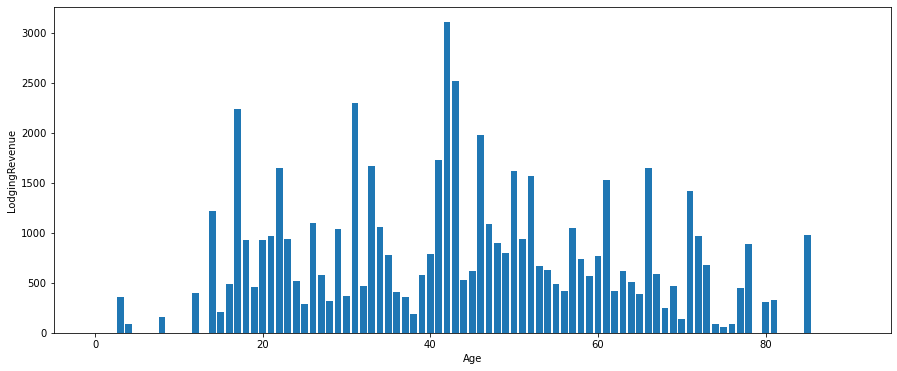

In [128]:
x=training_df['Age']
y=training_df['LodgingRevenue']
plt.figure(1 , figsize = (15 ,6))
plt.bar(x,y)
plt.xlabel('Age') , plt.ylabel('LodgingRevenue')
plt.show()

In [ ]:
#graph shows the relationship between age groups and lodging revenue
#incase of surplus, we need to prioritize the middle aged people in 40s
#as they spend more on the booking for amenties

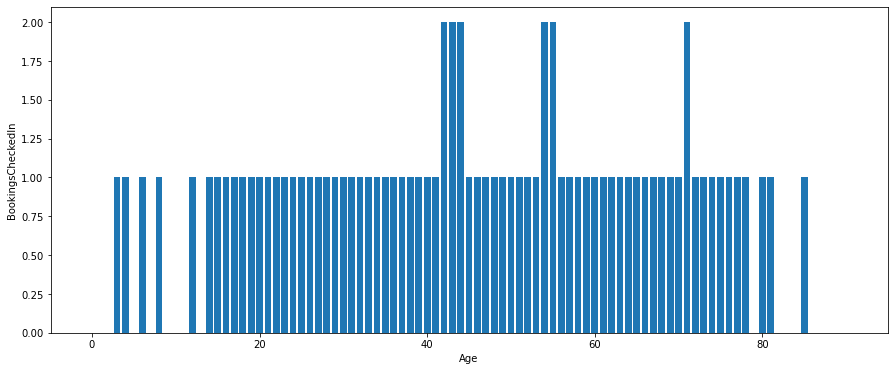

In [132]:
x=training_df['Age']
y=training_df['BookingsCheckedIn']
plt.figure(1 , figsize = (15 ,6))
plt.bar(x,y)
plt.xlabel('Age') , plt.ylabel('BookingsCheckedIn')
plt.show()

In [ ]:
#graph shows that people in 20s and 30s are prone to not checking in after the booking

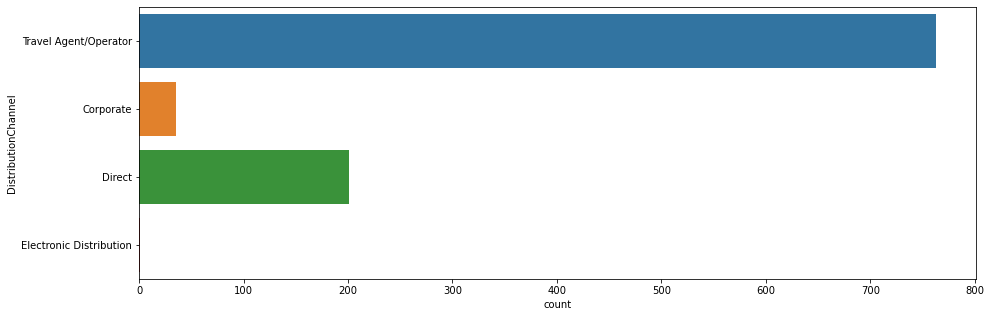

None


In [147]:
import seaborn
def graph3():
    plt.figure(1 , figsize = (15 , 5))
    seaborn.countplot(y = 'DistributionChannel' , data = pd.read_csv('training.csv'))
    plt.show()
print(graph3())

In [148]:
#above graph shows that a lot of people come through travel agents
#so we should focus on advertising ourselves through travel agents